In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict
import scipy.special

In [2]:
def plot_permutation(P):
    n = len(P)
    x_values = [i for i in range(n)]
    y_values = P
    plt.scatter(x_values,y_values, label = str(P))

In [3]:
def unrank_permutation(n_list,d):
    n = len(n_list)
    nn_list = [h for h in n_list]
    if d == 0:
        return nn_list
    for k in range(n):
        if d < (k+1)*np.math.factorial(n-1):
            nn_list.remove(n_list[k])
            return [n_list[k]] + unrank_permutation(nn_list,d - k*np.math.factorial(n-1)) 

In [4]:
def unrank_binomial(n,k,d):
    if n == 0:
        return ""
    C = scipy.special.binom(n-1,k)
    if d < C:
        return "0" + unrank_binomial(n-1,k,d)
    else:
        return "1" + unrank_binomial(n-1,k-1,d-C)

In [5]:
def relative_order(p):
    '''takes a list of n distinct integers and returns the permutation from 0 to n-1 with the same relative order.'''
    n = len(p)
    SP = sorted(p)
    output = [0]*n
    for i in range(n):
        ind = SP.index(p[i])
        output[i] = ind
    return output

In [6]:
def avoids_321_slow(permutation):
    """determines (True or False) if a permutation avoids the pattern 321"""
    n = len(permutation)
    for i in range(0,n-2):
        for j in range(i+1,n-1):
            if permutation[i] > permutation[j]:
                for k in range(j+1,n):
                    if permutation[j] > permutation[k]:
                        return False
    return True

**Curious Note**:
I made an error in the code above and set the range for i to start from 1 instead of 0 and I got the central binomial coefficients. I suppose this makes sense since it is counting the catalan number (1/(n+1))(2n choose n) n+1 times. Maybe something to look at in the future as a combinatorial justification of the catalan number closed form

In [7]:
avoids_321_slow([3,2,0,1])

False

In [8]:
def ALL_321_Avoiders(n):
    output = []
    fn = np.math.factorial(n)
    for i in range(fn):
        L = [k for k in range(n)]
        p = unrank_permutation(L,i)
        if avoids_321_slow(p):
            output = output + [p]
    return output

In [9]:
def count_different_patterns(P,k):
    """counts the number of different patterns of length k in permutation P"""
    count = 0
    pattern_hash = defaultdict(int)
    n = len(P)
    C = scipy.special.binom(n,k)
    for i in range(int(C)):
        fbs = unrank_binomial(n,k,i)
        rel_order = []
        for j in range(n):
            if fbs[j] == "1":
                rel_order = rel_order + [P[j]]
        RO = str(relative_order(rel_order))
        if pattern_hash[RO] == 0:
            count = count + 1
        pattern_hash[RO] = pattern_hash[RO] + 1
    return count

In [10]:
A7 = ALL_321_Avoiders(7)
pattern_hash = defaultdict(str)
for x in A7:
    pattern_hash[str(x)] = 0

In [11]:
def count_different_321_len_7_avoiders(P):
    """counts the number of different 321-avoiding patterns of length 7 in permutation P"""
    count = 0
    phash = pattern_hash.copy()
    n = len(P)
    C = scipy.special.binom(n,7)
    for i in range(int(C)):
        fbs = unrank_binomial(n,7,i)
        rel_order = []
        for j in range(n):
            if fbs[j] == "1":
                rel_order = rel_order + [P[j]]
        RO = str(relative_order(rel_order))
        if phash[RO] == 0:
            count = count + 1
            phash[RO] = phash[RO] + 1
    return count

In [12]:
print(count_different_321_len_7_avoiders([7,2,1,6,8,9,3,0,5,4]))
print(count_different_patterns([7,2,1,6,8,9,3,0,5,4],7))

1
45


In [13]:
A8 = ALL_321_Avoiders(8)
pattern_hash_8 = defaultdict(str)
for x in A8:
    pattern_hash_8[str(x)] = 0

In [14]:
def count_different_321_len_8_avoiders(P):
    """counts the number of different 321-avoiding patterns of length 8 in permutation P"""
    count = 0
    phash = pattern_hash_8.copy()
    n = len(P)
    C = scipy.special.binom(n,8)
    for i in range(int(C)):
        fbs = unrank_binomial(n,8,i)
        rel_order = []
        for j in range(n):
            if fbs[j] == "1":
                rel_order = rel_order + [P[j]]
        RO = str(relative_order(rel_order))
        if phash[RO] == 0:
            count = count + 1
            phash[RO] = phash[RO] + 1
    return count

In [15]:
A9 = ALL_321_Avoiders(9)
pattern_hash_9 = defaultdict(str)
for x in A9:
    pattern_hash_9[str(x)] = 0

In [16]:
def count_different_321_len_9_avoiders(P):
    """counts the number of different 321-avoiding patterns of length 9 in permutation P"""
    count = 0
    phash = pattern_hash_9.copy()
    n = len(P)
    C = scipy.special.binom(n,9)
    for i in range(int(C)):
        fbs = unrank_binomial(n,9,i)
        rel_order = []
        for j in range(n):
            if fbs[j] == "1":
                rel_order = rel_order + [P[j]]
        RO = str(relative_order(rel_order))
        if phash[RO] == 0:
            count = count + 1
            phash[RO] = phash[RO] + 1
    return count

In [17]:
def crossover1(P1,P2):
    """random entry fill in the gaps"""
    n = len(P1)
    offspring = [-1]*n
    r = random.random()
    if r < 0.5:
        offspring[0] = P1[0]
    else:
        offspring[0] = P2[0]
    for i in range(1,n):
        r = random.random()
        if r < 0.5:
            j = i
            while P1[j] in offspring:
                j = (j+1) % n
            offspring[i] = P1[j]
        else:
            j = i
            while P2[j] in offspring:
                j = (j+1) % n
            offspring[i] = P2[j]
    return offspring

In [18]:
def crossover2(P1,P2):
    """cut and crossfill"""
    n = len(P1)
    child1 = [-1]*n
    child2 = [-1]*n
    r = random.randint(1,n-1)
    for i in range(r):
        child1[i] = P1[i]
        child2[i] = P2[i]
    j = r
    while j < n:
        for k in range(n):
            if P2[k] not in child1:
                child1[j] = P2[k]
                j=j+1
    j = r
    while j < n:
        for k in range(n):
            if P1[k] not in child2:
                child2[j] = P1[k]
                j = j+1
    return [child1,child2]

In [19]:
def crossover3(P1,P2):
    """cut and cross-pattern"""
    n = len(P1)
    child1 = [-1]*n
    child2 = [-1]*n
    r = random.randint(1,n-1)
    for i in range(r):
        child1[i] = P1[i]
        child2[i] = P2[i]
    RO1 = relative_order(P1[r:])
    RO2 = relative_order(P2[r:])
    k = 0
    for i in range(n):
        if i not in child1:
            child1[r+RO2.index(k)] = i
            k = k+1
    k=0
    for i in range(n):
        if i not in child2:
            child2[r+RO1.index(k)] = i
            k = k+1
    return [child1,child2]

In [20]:
def mut1(Perm,r1,r2):
    """helper function for mutation1"""
    n = len(Perm)
    output = [i for i in Perm]
    if r1 == r2:
        return(Perm)
    output[r1+1]=Perm[r2]
    for i in range(r1+2,r2+1):
        output[i] = Perm[i-1]
    return output


def mutation1(Perm):
    """does a single random transposition to a permutation"""
    n = len(Perm)
    r1 = random.randint(0,n-1)
    r2 = random.randint(0,n-1)
    if r1<=r2:
        return mut1(Perm,r1,r2)
    else:
        REV = [Perm[n-1-j] for j in range(n)]
        output = mut1(REV,r2,r1)
        return [output[n-1-j] for j in range(n)]

In [21]:
def Evolutionary_Algorithm_random_universality_7_321(n,p,g,m,pp):
    """attempts to select the best n-length permutation based on how many different 7-patterns are found"""
    """p is size of population, g is number of fitness evaluations until algorithm terminates, m is mutation rate, pp is the size of the 'parent pool' to select parents"""
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(p):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_different_321_len_7_avoiders(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for the number of fitness evaluations
    fe = 0
    #start the loop
    while(fe<g+1):
        #randomly select pp individuals from the POPulation to form the parent pool
        randomset = random.sample(POP,pp)
        #select the top 2 from the parent pool to be parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        P3 = randomset[-3]
        P4 = randomset[-4]
        crossover_type = random.randint(1,3)
        if crossover_type == 1:
            child1 = crossover1(P1[1],P4[1])
            child2 = crossover1(P2[1],P3[1])
        if crossover_type == 2:
            [child1,child2] = crossover2(P1[1],P2[1])
        if crossover_type == 3:
            [child1,child2] = crossover3(P1[1],P2[1])
        fitness1 = count_different_321_len_7_avoiders(child1)
        fitness2 = count_different_321_len_7_avoiders(child1)
        fe = fe+2
        #apply mutation to the offspring at a m mutation rate
        mr = random.random()
        if mr < m: 
            notimproved = True
            while notimproved:
                mchild1 = mutation1(child1)
                mchild2 = mutation1(child2)
                mfitness1 = count_different_321_len_7_avoiders(child1)
                mfitness2 = count_different_321_len_7_avoiders(child1)
                fe = fe+2
                if mfitness1 >= fitness1:
                    notimproved = False
                    child1 = mchild1
                    fitness1 = mfitness1
                if mfitness2 >= fitness2:
                    notimproved = False
                    child2 = mchild2
                    fitness2 = mfitness2            
                mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:p]
        if fe % int(g/10) == 0:
            print([fe],[POP[0]],[POP[j][0] for j in range(10)],[POP[-1][0]],n,g/10)
            plot_permutation(POP[0][1])
            plt.show()
    print(fe)
    return POP

In [22]:
def Evolutionary_Algorithm_random_universality_321_8(n,p,g,m,pp):
    """attempts to select the best n-length permutation based on how many different 8-patterns are found"""
    """p is size of population, g is number of fitness evaluations until algorithm terminates, m is mutation rate, pp is the size of the 'parent pool' to select parents"""
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(p):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_different_321_len_8_avoiders(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for the number of fitness evaluations
    fe = 0
    #start the loop
    while(fe<g+1):
        #randomly select pp individuals from the POPulation to form the parent pool
        randomset = random.sample(POP,pp)
        #select the top 2 from the parent pool to be parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        P3 = randomset[-3]
        P4 = randomset[-4]
        crossover_type = random.randint(1,3)
        if crossover_type == 1:
            child1 = crossover1(P1[1],P4[1])
            child2 = crossover1(P2[1],P3[1])
        if crossover_type == 2:
            [child1,child2] = crossover2(P1[1],P2[1])
        if crossover_type == 3:
            [child1,child2] = crossover3(P1[1],P2[1])
        fitness1 = count_different_321_len_8_avoiders(child1)
        fitness2 = count_different_321_len_8_avoiders(child1)
        fe = fe+2
        #apply mutation to the offspring at a m mutation rate
        mr = random.random()
        if mr < m: 
            notimproved = True
            while notimproved:
                mchild1 = mutation1(child1)
                mchild2 = mutation1(child2)
                mfitness1 = count_different_321_len_8_avoiders(child1)
                mfitness2 = count_different_321_len_8_avoiders(child1)
                fe = fe+2
                if mfitness1 >= fitness1:
                    notimproved = False
                    child1 = mchild1
                    fitness1 = mfitness1
                if mfitness2 >= fitness2:
                    notimproved = False
                    child2 = mchild2
                    fitness2 = mfitness2            
                mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:p]
        if fe % int(g/10) == 0:
            print([fe],[POP[0]],[POP[j][0] for j in range(10)],[POP[-1][0]],n,g/10)
            plot_permutation(POP[0][1])
            plt.show()
    print(fe)
    return POP

In [26]:
def Evolutionary_Algorithm_random_universality_321_9(n,p,g,m,pp):
    """attempts to select the best n-length permutation based on how many different 9-patterns are found"""
    """p is size of population, g is number of fitness evaluations until algorithm terminates, m is mutation rate, pp is the size of the 'parent pool' to select parents"""
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(p):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_different_321_len_9_avoiders(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for the number of fitness evaluations
    fe = 0
    #start the loop
    while(fe<g+1):
        #randomly select pp individuals from the POPulation to form the parent pool
        randomset = random.sample(POP,pp)
        #select the top 2 from the parent pool to be parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        P3 = randomset[-3]
        P4 = randomset[-4]
        crossover_type = random.randint(1,3)
        if crossover_type == 1:
            child1 = crossover1(P1[1],P4[1])
            child2 = crossover1(P2[1],P3[1])
        if crossover_type == 2:
            [child1,child2] = crossover2(P1[1],P2[1])
        if crossover_type == 3:
            [child1,child2] = crossover3(P1[1],P2[1])
        fitness1 = count_different_321_len_9_avoiders(child1)
        fitness2 = count_different_321_len_9_avoiders(child1)
        fe = fe+2
        #apply mutation to the offspring at a m mutation rate
        mr = random.random()
        if mr < m: 
            notimproved = True
            while notimproved:
                mchild1 = mutation1(child1)
                mchild2 = mutation1(child2)
                mfitness1 = count_different_321_len_9_avoiders(child1)
                mfitness2 = count_different_321_len_9_avoiders(child1)
                fe = fe+2
                if mfitness1 >= fitness1:
                    notimproved = False
                    child1 = mchild1
                    fitness1 = mfitness1
                if mfitness2 >= fitness2:
                    notimproved = False
                    child2 = mchild2
                    fitness2 = mfitness2            
                mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:p]
        if fe % int(g/10) == 0:
            print([fe],[POP[0]],[POP[j][0] for j in range(10)],[POP[-1][0]],n,g/10)
            plot_permutation(POP[0][1])
            plt.show()
    print(fe)
    return POP

In [23]:
U = [[0]*20 for i in range(20)]

In [92]:
k = 7
for m in range(1,14):
    n = k+m
    EA = Evolutionary_Algorithm_random_universality_321(n,1000,10000,0.8,25)
    U[m][k] = EA[0][0]
    print(U[m][k],(m,k))

8 (1, 7)
32 (2, 7)
86 (3, 7)
167 (4, 7)
252 (5, 7)
334 (6, 7)
389 (7, 7)
400 (8, 7)
424 (9, 7)
426 (10, 7)
427 (11, 7)
429 (12, 7)


KeyboardInterrupt: 

**NOTE**

Trying to see if universality of 321 is ever better than proper containment of 321.

Here is the charts for 321 and proper 321 from Michael:

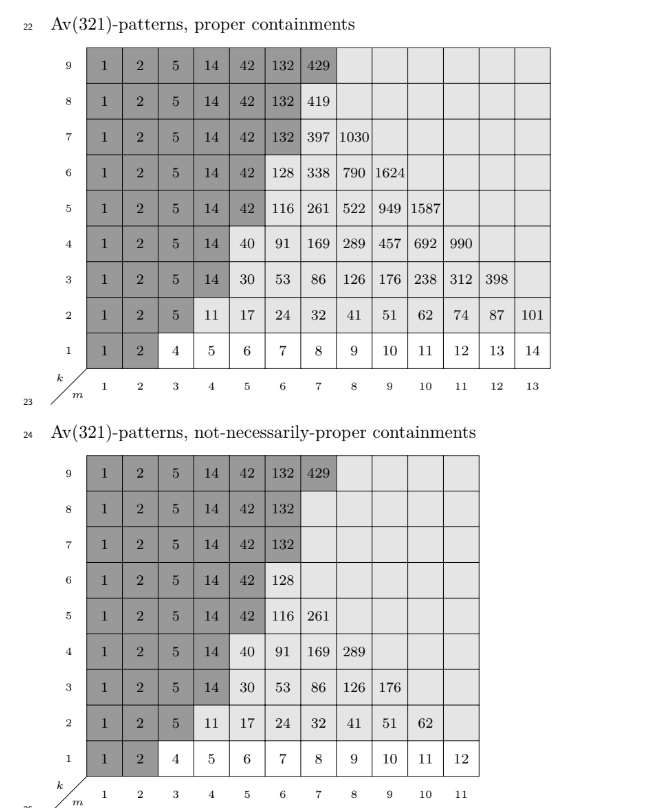

And here are my numbers for column 7: (using input of: n,1000,10000,0.8,25):

8 (1, 7)

32 (2, 7)

86 (3, 7)

167 (4, 7)

252 (5, 7)

334 (6, 7)

389 (7, 7)

400 (8, 7)

424 (9, 7)

426 (10, 7)

427 (11, 7)

429 (12, 7)


This does not really show much but I'll bump up the population and number of fitness evaluations to see if I can at least match the proper containment chart:

[40000] [[338, [4, 2, 0, 6, 1, 9, 12, 3, 10, 5, 11, 8, 7]]] [338, 338, 338, 338, 320, 320, 318, 318, 318, 318] [37] 13 40000.0


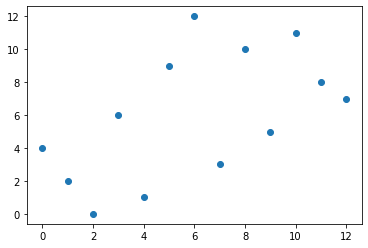

[80000] [[338, [4, 8, 0, 9, 2, 11, 1, 3, 5, 12, 6, 7, 10]]] [338, 338, 338, 338, 338, 338, 338, 338, 338, 338] [97] 13 40000.0


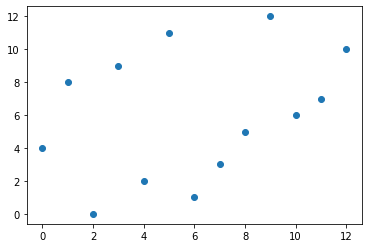

[200000] [[338, [11, 5, 0, 7, 9, 1, 3, 10, 4, 2, 12, 6, 8]]] [338, 338, 338, 338, 338, 338, 338, 338, 338, 338] [212] 13 40000.0


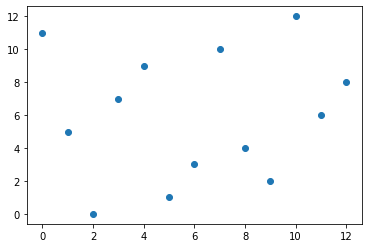

[360000] [[338, [11, 5, 0, 7, 9, 2, 1, 3, 10, 4, 12, 6, 8]]] [338, 338, 338, 338, 338, 338, 338, 338, 338, 338] [250] 13 40000.0


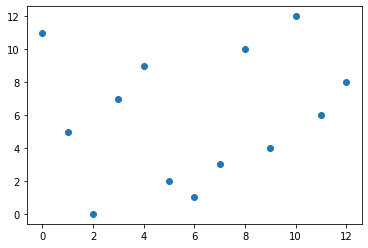

400002
338 (6, 7)
[80000] [[397, [5, 7, 0, 9, 11, 12, 1, 4, 6, 3, 13, 10, 8, 2]]] [397, 397, 388, 388, 381, 381, 380, 380, 379, 379] [138] 14 40000.0


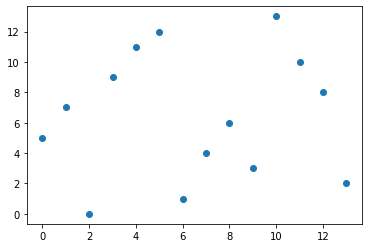

[120000] [[397, [5, 7, 0, 9, 11, 12, 1, 4, 6, 3, 13, 10, 8, 2]]] [397, 397, 389, 389, 389, 389, 388, 388, 388, 388] [211] 14 40000.0


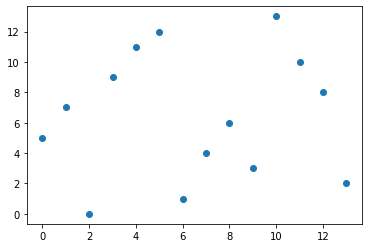

[200000] [[397, [5, 7, 0, 9, 11, 12, 1, 4, 6, 3, 13, 10, 8, 2]]] [397, 397, 396, 396, 396, 396, 396, 396, 396, 396] [287] 14 40000.0


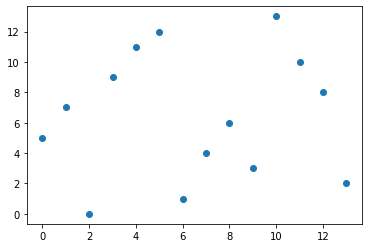

[280000] [[397, [5, 7, 0, 9, 11, 12, 1, 4, 6, 3, 13, 10, 8, 2]]] [397, 397, 396, 396, 396, 396, 396, 396, 396, 396] [316] 14 40000.0


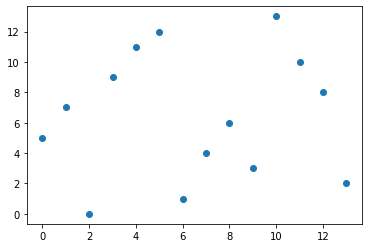

[360000] [[397, [5, 7, 0, 9, 11, 12, 1, 4, 6, 3, 13, 10, 8, 2]]] [397, 397, 396, 396, 396, 396, 396, 396, 396, 396] [327] 14 40000.0


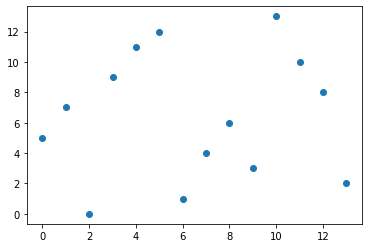

[400000] [[397, [5, 7, 0, 9, 11, 12, 1, 4, 6, 3, 13, 10, 8, 2]]] [397, 397, 396, 396, 396, 396, 396, 396, 396, 396] [330] 14 40000.0


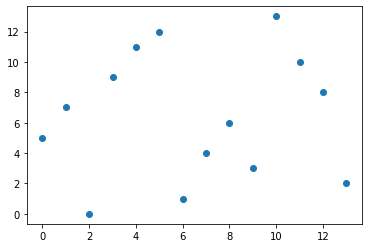

400004
397 (7, 7)
[40000] [[407, [7, 1, 3, 9, 5, 10, 11, 4, 8, 13, 0, 14, 2, 6, 12]]] [407, 407, 407, 407, 394, 394, 392, 392, 392, 392] [85] 15 40000.0


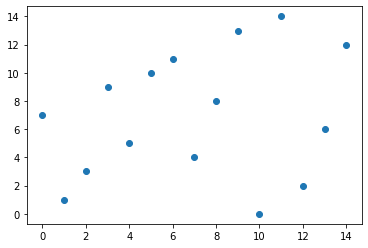

[80000] [[415, [5, 8, 3, 0, 9, 11, 14, 12, 4, 10, 2, 13, 6, 1, 7]]] [415, 415, 415, 415, 415, 415, 410, 410, 408, 408] [181] 15 40000.0


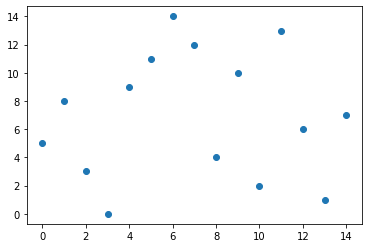

[120000] [[415, [10, 0, 6, 9, 1, 5, 11, 2, 13, 3, 7, 14, 8, 4, 12]]] [415, 415, 415, 415, 415, 415, 415, 415, 415, 415] [247] 15 40000.0


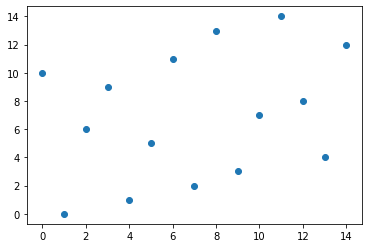

[160000] [[417, [5, 0, 6, 12, 9, 1, 8, 2, 11, 7, 3, 14, 4, 10, 13]]] [417, 417, 417, 417, 417, 417, 417, 417, 417, 417] [293] 15 40000.0


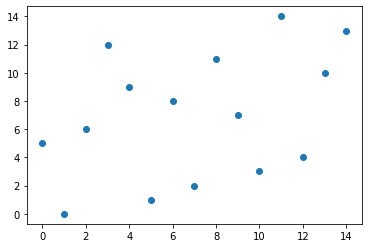

[200000] [[417, [9, 0, 4, 6, 13, 10, 1, 3, 2, 12, 5, 7, 14, 8, 11]]] [417, 417, 417, 417, 417, 417, 417, 417, 417, 417] [325] 15 40000.0


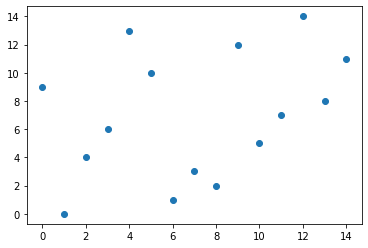

[320000] [[417, [14, 0, 4, 6, 2, 10, 1, 13, 12, 3, 5, 7, 11, 9, 8]]] [417, 417, 417, 417, 417, 417, 417, 417, 417, 417] [363] 15 40000.0


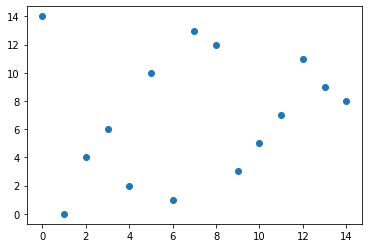

[360000] [[417, [14, 0, 4, 6, 2, 10, 1, 13, 12, 3, 5, 7, 11, 9, 8]]] [417, 417, 417, 417, 417, 417, 417, 417, 417, 417] [368] 15 40000.0


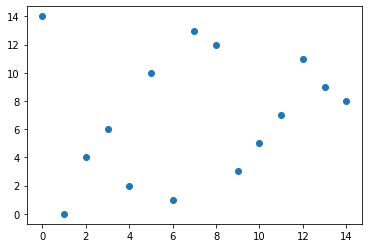

400002
417 (8, 7)


In [ ]:
k = 7
for m in range(6,10):
    n = k+m
    EA = Evolutionary_Algorithm_random_universality_7_321(n,30000,400000,0.9,100)
    U[m][k] = EA[0][0]
    print(U[m][k],(m,k))

In [24]:
avoids_321_slow([12, 5, 7, 1, 9, 3, 6, 8, 0, 2, 11, 4, 10])

False

[80000] [[500, [1, 4, 7, 2, 0, 8, 3, 10, 5, 11, 6, 9, 12]]] [500, 500, 498, 498, 496, 496, 493, 493, 493, 493] [79] 13 40000.0


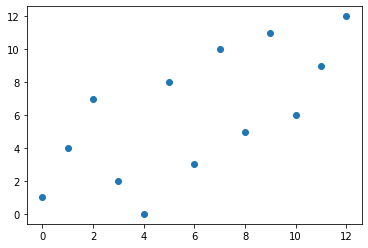

400002
519 (5, 8)
[40000] [[713, [0, 11, 3, 6, 1, 7, 2, 9, 4, 12, 5, 8, 13, 10]]] [713, 713, 682, 682, 650, 650, 650, 650, 650, 650] [28] 14 40000.0


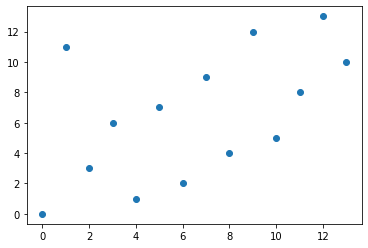

[80000] [[738, [5, 2, 4, 0, 6, 9, 1, 3, 11, 7, 12, 8, 10, 13]]] [738, 738, 738, 738, 738, 738, 716, 716, 713, 713] [123] 14 40000.0


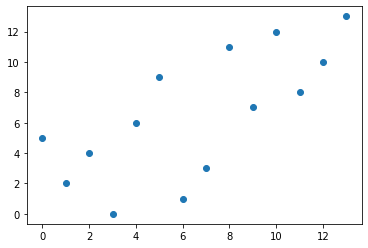

[160000] [[790, [3, 5, 0, 6, 1, 9, 2, 10, 4, 11, 7, 13, 8, 12]]] [790, 790, 790, 790, 778, 778, 778, 778, 778, 778] [301] 14 40000.0


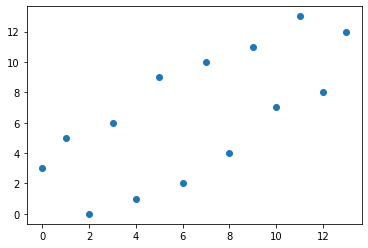

[200000] [[790, [3, 5, 0, 6, 1, 9, 2, 10, 4, 11, 7, 13, 8, 12]]] [790, 790, 790, 790, 790, 790, 790, 790, 790, 790] [369] 14 40000.0


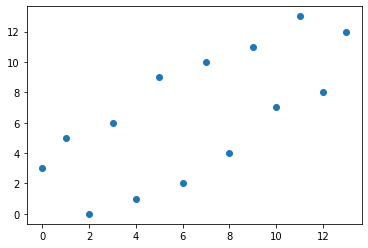

[240000] [[790, [5, 2, 4, 0, 8, 10, 12, 3, 6, 1, 13, 7, 9, 11]]] [790, 790, 790, 790, 790, 790, 790, 790, 790, 790] [423] 14 40000.0


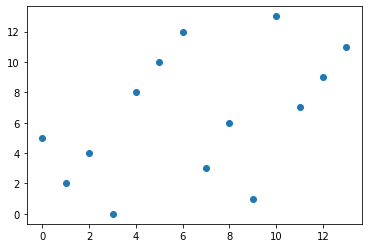

[280000] [[790, [5, 8, 1, 4, 10, 3, 6, 11, 13, 0, 2, 7, 9, 12]]] [790, 790, 790, 790, 790, 790, 790, 790, 790, 790] [464] 14 40000.0


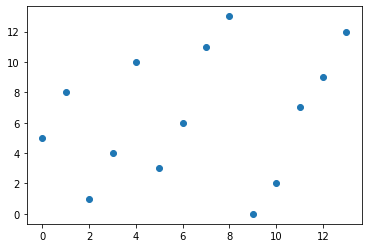

[320000] [[790, [9, 5, 0, 7, 1, 3, 10, 12, 4, 6, 13, 2, 8, 11]]] [790, 790, 790, 790, 790, 790, 790, 790, 790, 790] [495] 14 40000.0


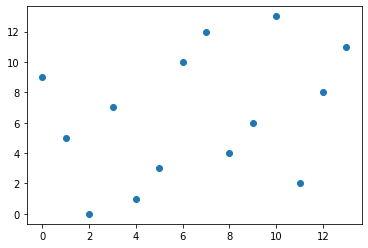

[360000] [[790, [9, 5, 0, 7, 1, 3, 10, 12, 4, 6, 13, 2, 8, 11]]] [790, 790, 790, 790, 790, 790, 790, 790, 790, 790] [512] 14 40000.0


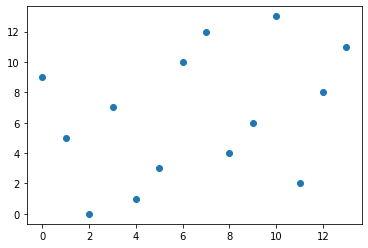

[400000] [[790, [9, 5, 0, 7, 1, 3, 10, 12, 4, 6, 13, 2, 8, 11]]] [790, 790, 790, 790, 790, 790, 790, 790, 790, 790] [530] 14 40000.0


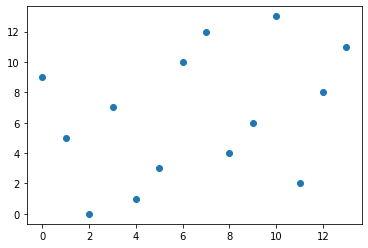

400004
790 (6, 8)
[80000] [[978, [2, 6, 4, 0, 8, 10, 1, 9, 3, 12, 5, 13, 14, 7, 11]]] [978, 978, 976, 976, 976, 976, 976, 976, 976, 976] [219] 15 40000.0


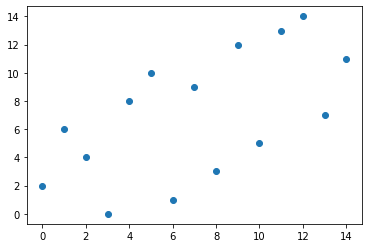

[200000] [[1016, [4, 0, 14, 6, 10, 1, 8, 11, 7, 3, 5, 12, 9, 13, 2]]] [1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016] [620] 15 40000.0


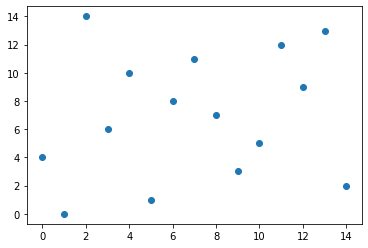

[360000] [[1016, [12, 4, 0, 8, 10, 1, 11, 2, 14, 3, 5, 13, 7, 9, 6]]] [1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016] [766] 15 40000.0


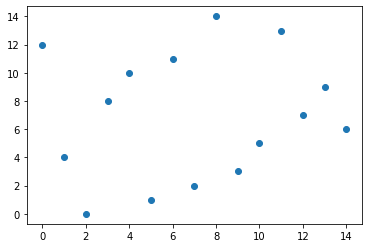

400002
1016 (7, 8)


In [24]:
k = 8
for m in range(5,8):
    n = k+m
    EA = Evolutionary_Algorithm_random_universality_321_8(n,30000,400000,0.9,100)
    print(EA[0][0],(m,k))

[40000] [[457, [2, 11, 5, 0, 7, 1, 8, 3, 10, 4, 12, 6, 9]]] [457, 457, 427, 427, 426, 426, 426, 426, 425, 425] [2] 13 40000.0


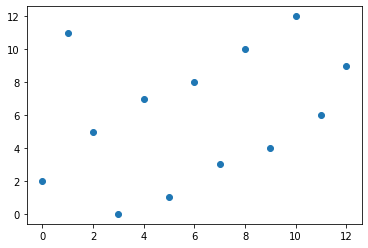

[80000] [[457, [2, 11, 5, 0, 7, 1, 8, 3, 10, 4, 12, 6, 9]]] [457, 457, 454, 454, 453, 453, 453, 453, 453, 453] [36] 13 40000.0


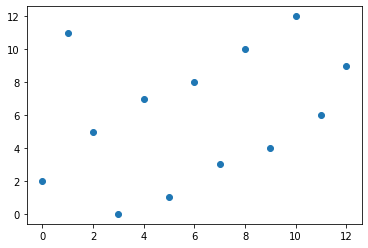

[120000] [[457, [2, 11, 5, 0, 7, 1, 8, 3, 10, 4, 12, 6, 9]]] [457, 457, 457, 457, 456, 456, 454, 454, 454, 454] [85] 13 40000.0


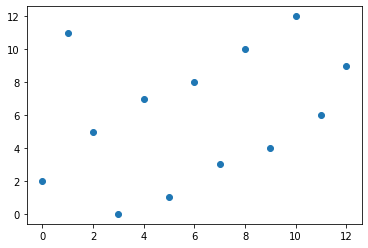

400002
457 (4, 9)
[40000] [[855, [6, 0, 1, 7, 3, 8, 4, 9, 10, 2, 5, 12, 13, 11]]] [855, 855, 855, 855, 822, 822, 802, 802, 785, 785] [6] 14 40000.0


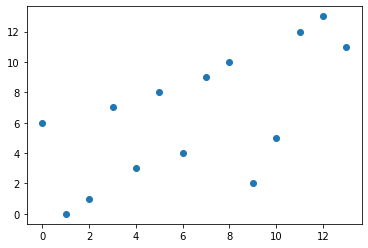

[80000] [[893, [3, 0, 5, 1, 7, 10, 4, 2, 11, 6, 12, 8, 13, 9]]] [893, 893, 885, 885, 876, 876, 876, 876, 876, 876] [80] 14 40000.0


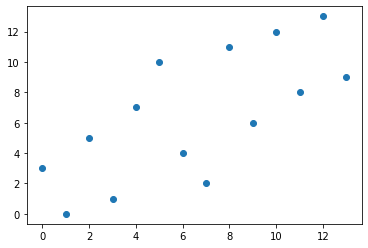

[160000] [[925, [4, 6, 0, 2, 7, 1, 10, 3, 11, 5, 8, 13, 9, 12]]] [925, 925, 925, 925, 925, 925, 925, 925, 925, 925] [269] 14 40000.0


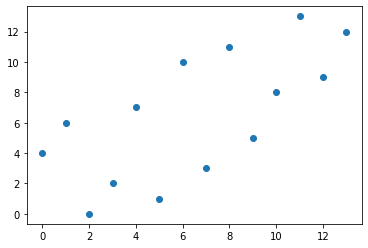

[200000] [[925, [5, 1, 10, 4, 6, 3, 7, 11, 0, 13, 8, 2, 9, 12]]] [925, 925, 925, 925, 925, 925, 925, 925, 925, 925] [351] 14 40000.0


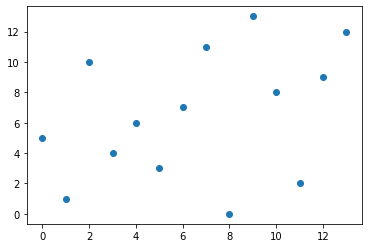

[280000] [[949, [1, 4, 10, 7, 0, 2, 8, 3, 5, 11, 13, 6, 9, 12]]] [949, 949, 925, 925, 925, 925, 925, 925, 925, 925] [450] 14 40000.0


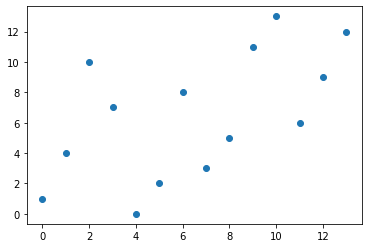

[360000] [[949, [1, 4, 10, 7, 0, 2, 8, 3, 5, 11, 13, 6, 9, 12]]] [949, 949, 925, 925, 925, 925, 925, 925, 925, 925] [497] 14 40000.0


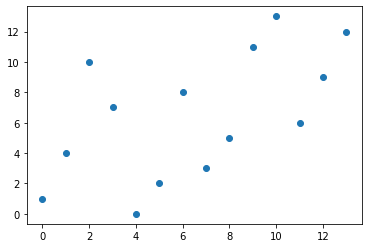

400002
949 (5, 9)
[80000] [[1500, [1, 4, 6, 0, 9, 2, 5, 11, 3, 12, 7, 14, 8, 10, 13]]] [1500, 1500, 1392, 1392, 1392, 1392, 1388, 1388, 1388, 1388] [153] 15 40000.0


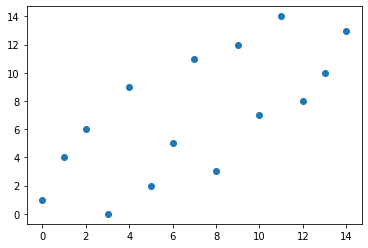

[120000] [[1523, [2, 0, 4, 7, 6, 9, 11, 3, 5, 12, 8, 1, 10, 14, 13]]] [1523, 1523, 1513, 1513, 1505, 1505, 1500, 1500, 1465, 1465] [356] 15 40000.0


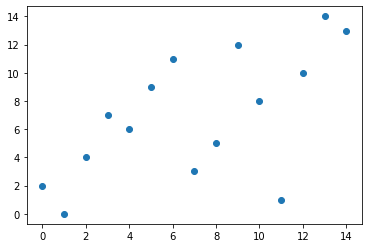

[160000] [[1523, [2, 0, 4, 7, 6, 9, 11, 3, 5, 12, 8, 1, 10, 14, 13]]] [1523, 1523, 1517, 1517, 1517, 1517, 1517, 1517, 1517, 1517] [533] 15 40000.0


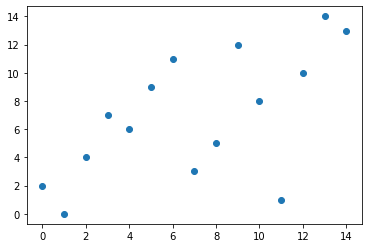

[200000] [[1586, [4, 6, 0, 7, 9, 2, 1, 11, 3, 12, 13, 5, 8, 14, 10]]] [1586, 1586, 1586, 1586, 1556, 1556, 1556, 1556, 1523, 1523] [673] 15 40000.0


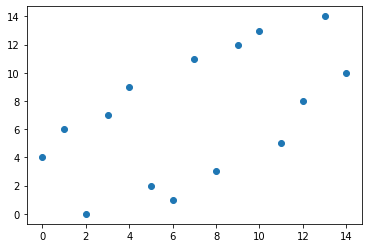

[240000] [[1586, [4, 6, 0, 8, 2, 9, 1, 3, 5, 12, 11, 14, 7, 10, 13]]] [1586, 1586, 1586, 1586, 1586, 1586, 1586, 1586, 1586, 1586] [785] 15 40000.0


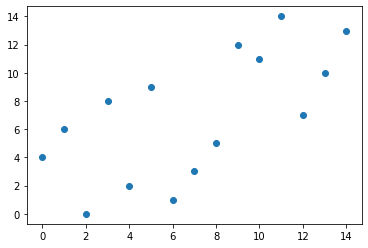

[280000] [[1586, [7, 14, 9, 0, 2, 3, 11, 12, 8, 6, 4, 10, 13, 1, 5]]] [1586, 1586, 1586, 1586, 1586, 1586, 1586, 1586, 1586, 1586] [858] 15 40000.0


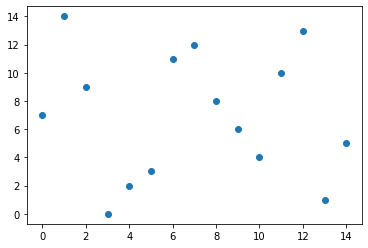

[320000] [[1586, [13, 4, 6, 0, 8, 2, 9, 11, 1, 3, 5, 12, 14, 7, 10]]] [1586, 1586, 1586, 1586, 1586, 1586, 1586, 1586, 1586, 1586] [913] 15 40000.0


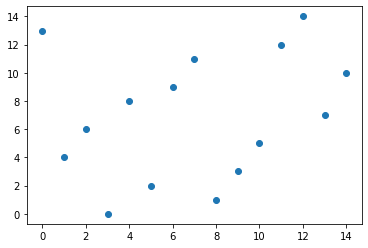

400002
1586 (6, 9)


In [28]:
k = 9
for m in range(4,7):
    n = k+m
    EA = Evolutionary_Algorithm_random_universality_321_9(n,30000,400000,0.9,100)
    print(EA[0][0],(m,k))